- multilclass -> softmax
- 크면 클 수록 성능차이 늘어난다.
#### queue runners
- 다 밀어 넣고 out of range error 발생
- ETL (데이터 전처리, transform, loading) 

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
%matplotlib inline

### 디멘션 문제
- (r, c, 1) <--> (r, c)
- reduce_mean( , axis=-1) -> 뒤에 1 사라진다.
- expand_dim( , axis=-1) -> 다시 뒤에 1 만들어 준다.

[1]


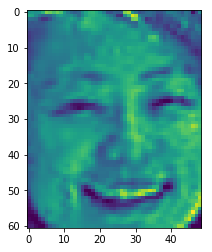

[1]


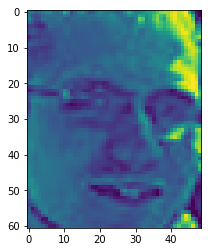

[1]


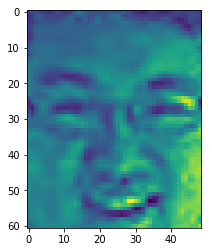

[1]


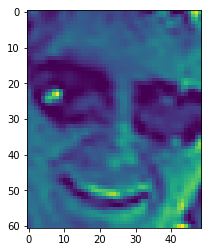

[1]


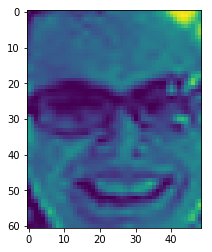

[1]


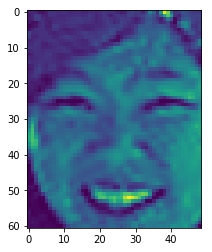

[2]


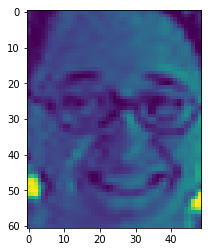

[1]


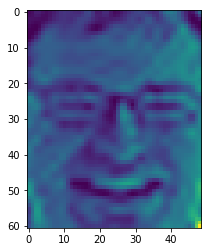

[1]


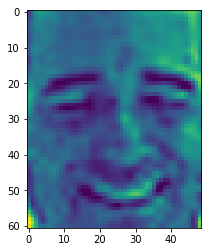

[1]


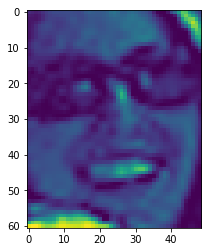

[1]


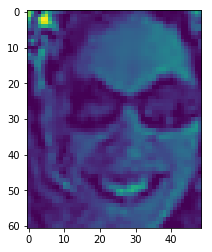

[0]


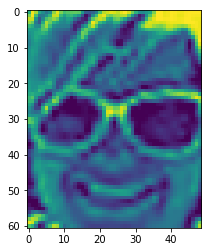

[0]


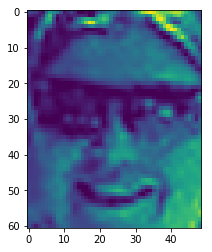

[0]


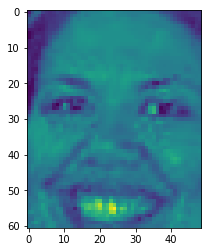

[0]


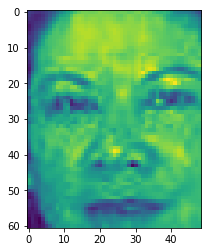

[0]


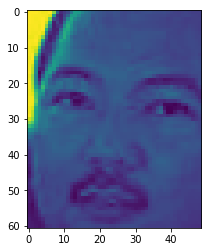

[0]


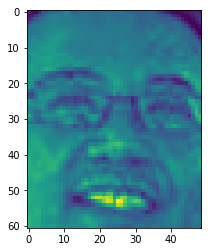

[2]


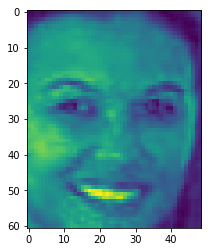

[2]


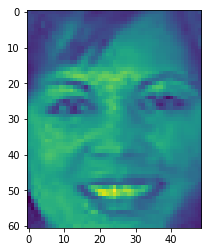

[2]


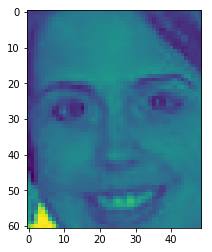

[2]


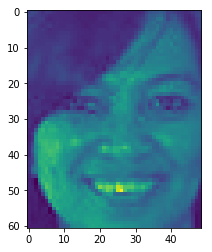

[2]


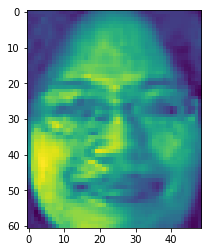

[1]


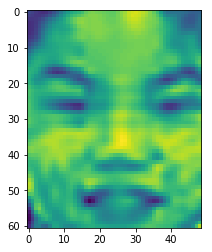

[1]


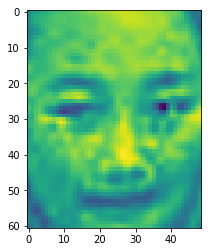

[1]


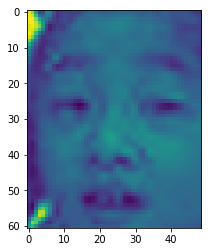

[1]


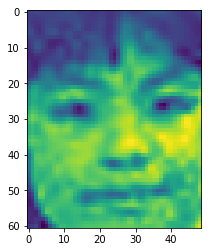

[1]


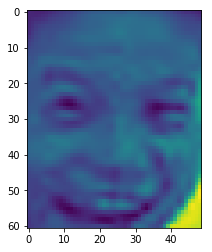

[1]


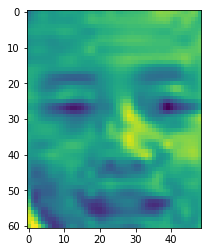

[1]


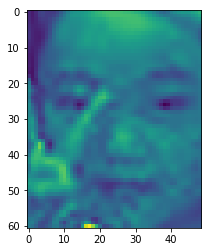

[1]


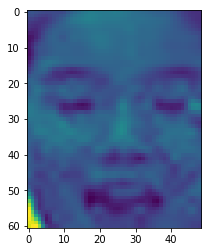

[1]


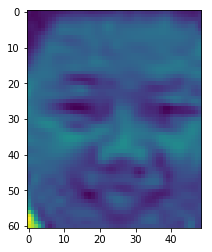

[1]


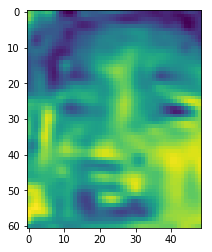

[1]


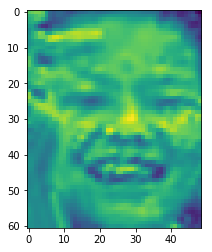

[1]


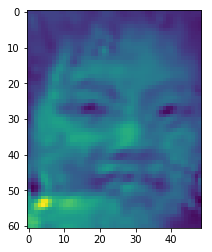

[1]


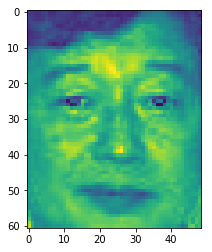

[1]


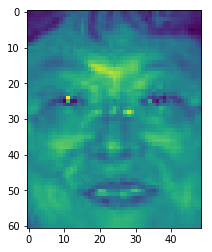

[1]


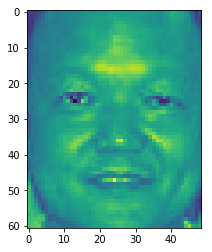

[1]


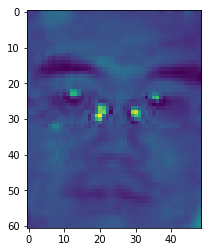

[1]


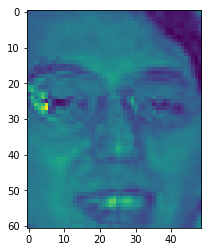

[1]


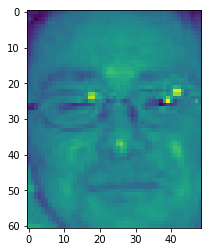

[1]


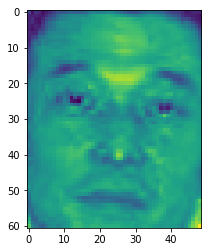

[1]


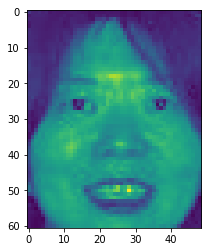

[1]


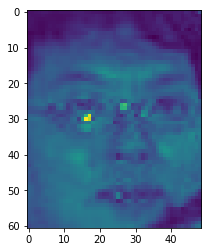

[1]


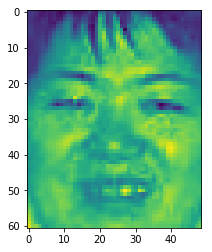

[0]


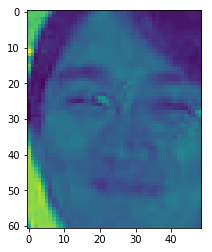

[1]


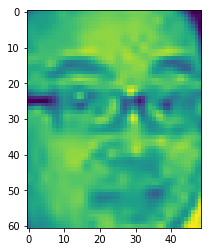

[0]


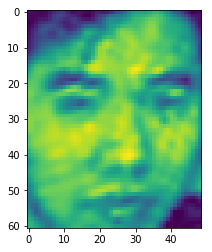

[0]


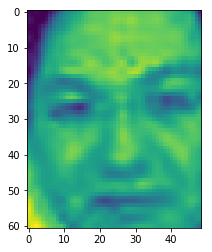

[0]


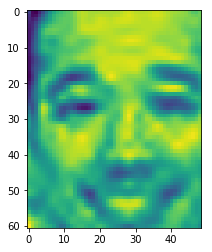

[0]


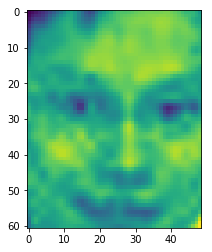

[1]


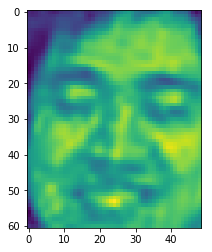

[1]


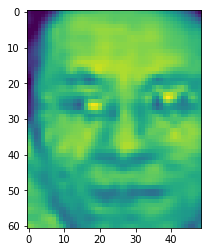

[1]


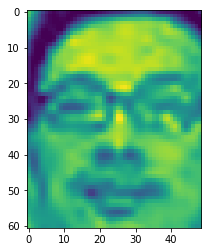

[1]


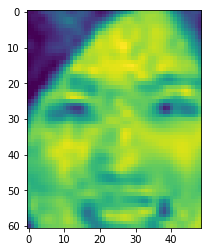

[1]


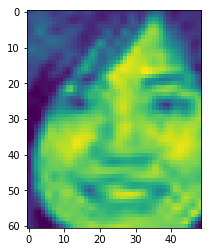

[1]


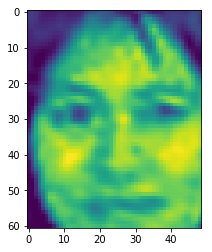

[1]


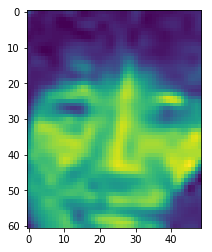

[1]


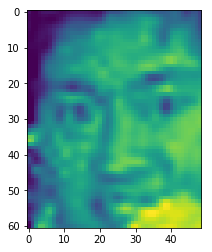

[1]


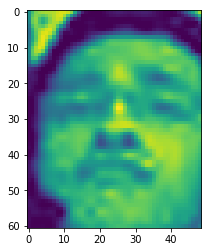

[1]


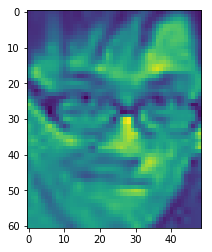

[1]


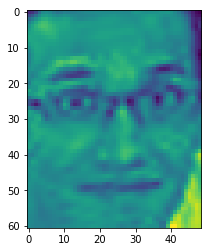

[1]


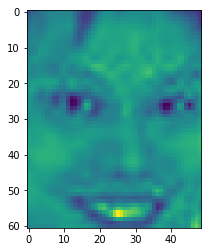

[2]


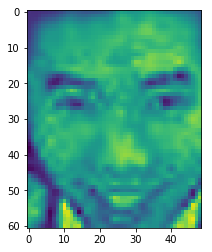

[0]


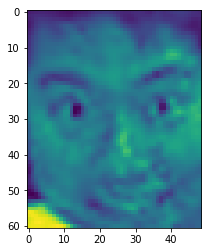

[2]


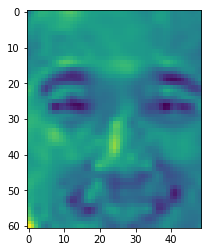

[2]


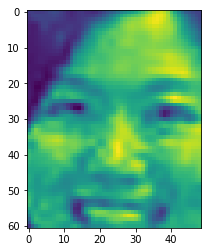

[1]


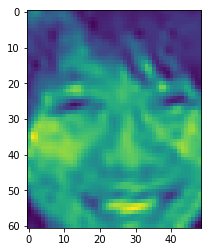

[1]


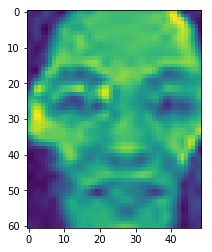

[1]


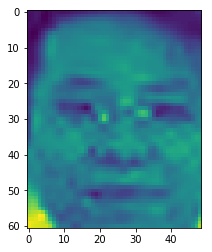

[1]


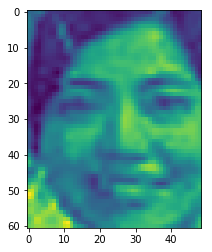

[0]


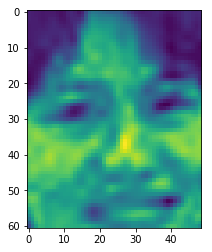

[0]


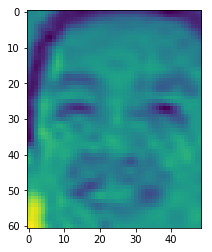

[0]


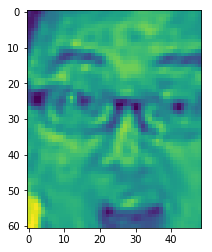

[0]


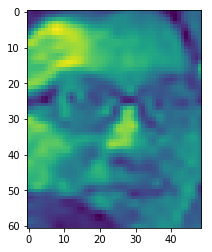

[0]


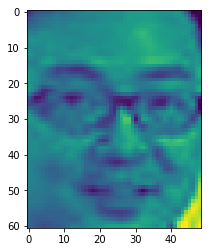

[0]


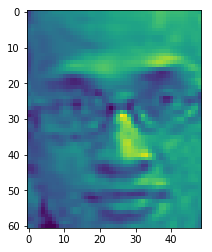

[1]


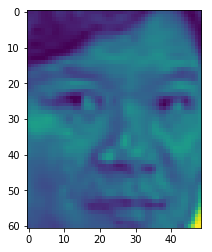

[0]


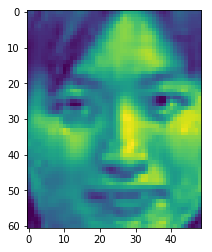

[2]


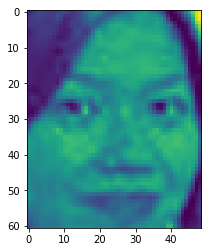

[0]


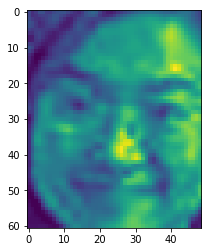

[1]


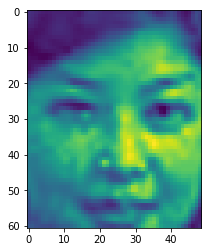

[1]


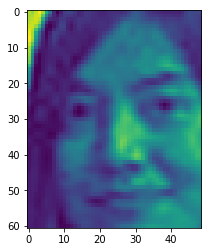

[1]


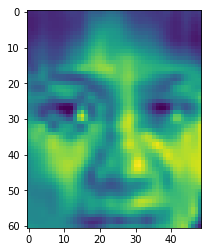

[1]


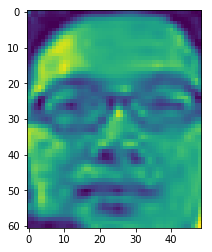

[0]


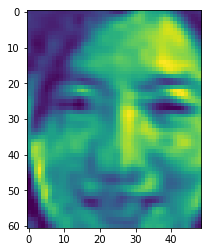

[0]


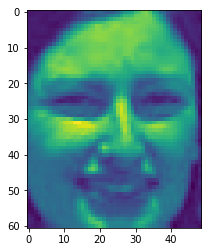

[0]


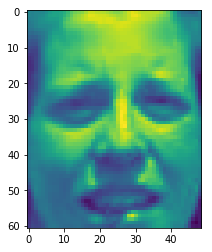

[1]


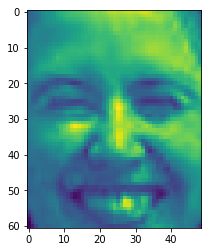

[1]


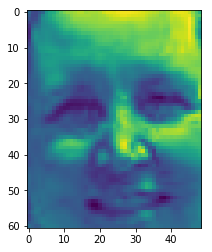

[0]


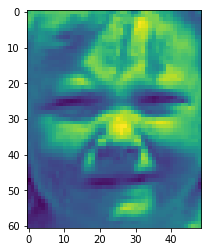

[0]


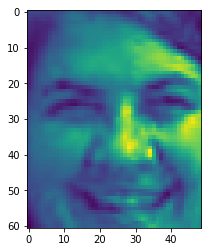

[0]


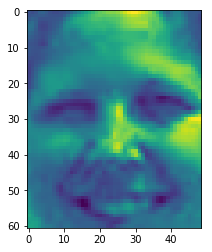

[1]


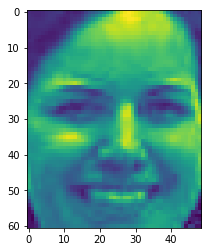

[0]


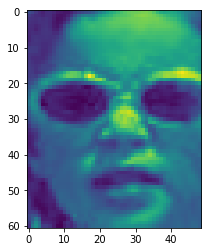

[1]


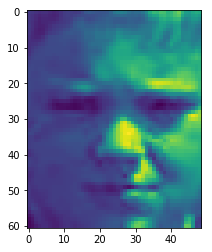

[1]


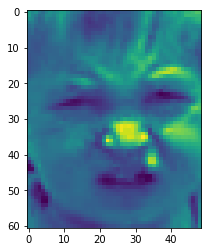

[0]


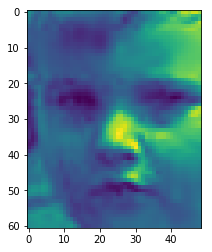

[1]


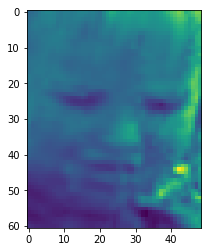

[1]


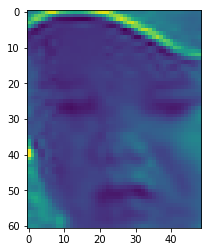

[1]


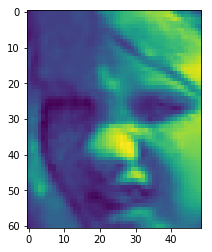

In [16]:
tf.reset_default_graph()
image_dir = './tfrecord_dataset/images_png'
label_name = './tfrecord_dataset/label_csv/label.csv'
image_names = [os.path.join(image_dir, n) for n in os.listdir(image_dir)]
image_names = sorted(image_names)

#shuffle 지금 하면 라벨과 매칭이 안된다. = False
img_name_queue = tf.train.string_input_producer(image_names, shuffle=False)
lable_name_queue = tf.train.string_input_producer([label_name], shuffle=False)

img_reader = tf.WholeFileReader()
label_reader = tf.TextLineReader()

key, value = img_reader.read(img_name_queue)
txt_key, txt_value = label_reader.read(lable_name_queue)

# 이미지로 보기위해 decoding
img_png = tf.image.decode_png(value)
img_png = tf.reduce_mean(img_png, axis = -1)

label_csv = tf.decode_csv(txt_value, record_defaults=[[0]])


with tf.Session() as sess:
    coord = tf.train.Coordinator()
    thread = tf.train.start_queue_runners(sess, coord)
    for i in range(100):
        _img, _label = sess.run([img_png, label_csv])
        print(sess.run(label_csv))
        plt.imshow(_img)
        plt.show()
    coord.request_stop()
    coord.join(thread)
    